# 视觉生成模型领域总述
- [0 章节目标](#0-章节目标)
- [1 发展历史](#1-发展历史)
  - [初期：2014年 至 2016年](#初期2014年-至-2016年)
      - [基于生成对抗网络（GAN）的模型](#基于生成对抗网络gan的模型)
      - [变换模型和VAE的兴起](#变换模型和vae的兴起)
      - [自回归模型与PixelCNN、PixelSNAIL等](#自回归模型与pixelcnnpixelsnail等)
  - [中期：2017年 至 2020年](#中期2017年-至-2020年)
      - [BigGAN与生成对抗网络的突破](#biggan与生成对抗网络的突破)
      - [StyleGAN与生成图像的控制](#stylegan与生成图像的控制)
  - [现阶段：2021年 至今](#现阶段2021年-至今)
      - [CLIP与DALL·E](#clip与dalle)
      - [扩散模型的崛起](#扩散模型的崛起)
      - [生成模型的开放与普及](#生成模型的开放与普及)
      - [SDXL \& Flux \& 未来](#sdxl--flux--未来)
- [2 Stable Diffusion 1.5](#2-stable-diffusion-15)
  - [2.1 简介](#21-简介)
  - [2.2 模型架构：](#22-模型架构)
      - [Stable Diffusion 1.5 的架构主要由以下几个部分组成：](#stable-diffusion-15-的架构主要由以下几个部分组成)
  - [2.3 模型训练原理](#23-模型训练原理)
- [3 Stable Diffusion XL](#3-stable-diffusion-xl)
  - [3.1 简介](#31-简介)
  - [3.2 模型改进](#32-模型改进)
      - [更大的模型规模](#更大的模型规模)
      - [多级生成和细节恢复](#多级生成和细节恢复)
      - [改进的扩散过程](#改进的扩散过程)
      - [强化的条件输入处理](#强化的条件输入处理)
        - [设计了很多训练Tricks，包括图像尺寸条件化策略、图像裁剪参数条件化策略以及多尺度训练策略等](#设计了很多训练tricks包括图像尺寸条件化策略图像裁剪参数条件化策略以及多尺度训练策略等)
- [4 Flux](#4-flux)
  - [4.1 简介](#41-简介)
  - [4.2 模型改进](#42-模型改进)
      - [多模态架构](#多模态架构)
      - [多文本编码器](#多文本编码器)
      - [流匹配训练方法](#流匹配训练方法)
      - [旋转位置嵌入（Rotary Position Embedding）](#旋转位置嵌入rotary-position-embedding)
      - [并行注意力层](#并行注意力层)

# 0 章节目标
- 了解视觉生成领域的发展历史
- 了解Stable Diffusion时代主流生成模型

# 1 发展历史

## 初期：2014年 至 2016年
#### 基于生成对抗网络（GAN）的模型
视觉生成模型的发展可以追溯到生成对抗网络（GANs）的提出。2014年，Ian Goodfellow等人提出了生成对抗网络（Generative Adversarial Networks, GANs）。GAN通过对抗训练方式，让生成器（Generator）和判别器（Discriminator）在博弈中不断优化，最终使得生成器能够生成逼真的图像。

![GAN](https://pic1.zhimg.com/80/v2-8fb3a568c252eeae621bd250ccb8b2cc_1440w.webp)

#### 变换模型和VAE的兴起
与GAN同期，变分自编码器（Variational Autoencoders，VAE）被提出，也成为了生成模型领域的一个重要方向。VAE基于概率图模型，通过学习数据的潜在空间分布来生成数据。VAE通过最大化数据的对数似然（log-likelihood）来训练模型，并且其生成过程更加稳定。

然而，VAE生成的图像质量往往不如GAN，特别是在细节和多样性方面。

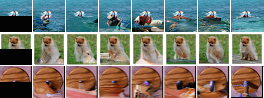

#### 自回归模型与PixelCNN、PixelSNAIL等
在这一时期，生成对抗网络（GANs）和变分自编码器（VAE）逐渐成为了研究的主流，而随着深度学习技术的不断演进，自回归模型（Autoregressive Models）也逐渐得到应用。
PixelCNN（2016）是基于自回归的生成模型，通过逐像素生成图像，考虑每个像素与之前像素之间的条件依赖关系。虽然生成效果较好，但计算复杂度高，需要逐像素生成，速度较慢。为了提高效率，PixelSNAIL（2017）引入了自注意力机制（Self-Attention），在像素级生成中捕捉长范围的依赖，提高了生成质量和效率。

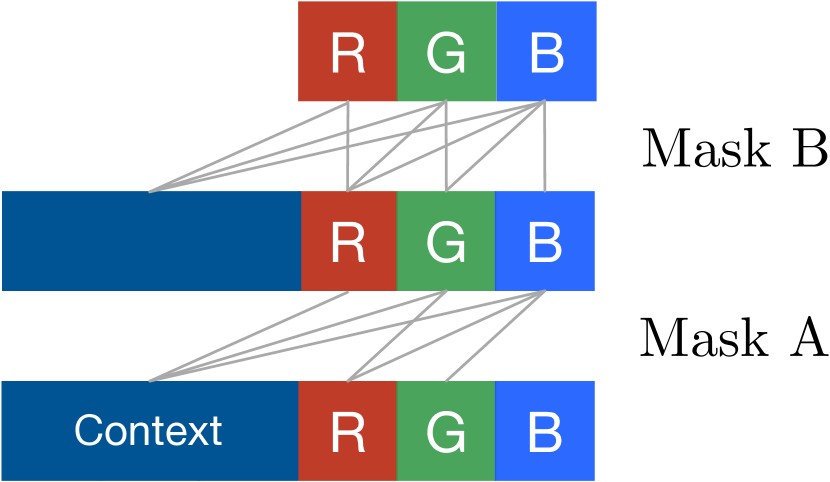

这类模型在生成过程中考虑了像素之间的条件依赖关系，因此能够生成高质量的图像。

## 中期：2017年 至 2020年
#### BigGAN与生成对抗网络的突破
2018年年底，BigGAN由DeepMind提出，并成功突破了GAN模型的限制。BigGAN采用了更大的网络架构和更强的正则化技术，能够在生成高质量图像方面超过以往的模型。BigGAN在ImageNet上生成的高分辨率图像质量接近真实数据，标志着GAN在图像生成方面的一个重要里程碑。

BigGAN的成功为后续的生成对抗网络模型提供了一个重要的设计框架，很多GAN的变体也开始采纳类似的大型架构和高级正则化技术。

#### StyleGAN与生成图像的控制
2019年，StyleGAN（由NVIDIA提出）进一步推动了GAN模型的进步，尤其是在生成图像的细节和多样性方面。StyleGAN的核心创新在于它引入了样式向量（Style Vector），这使得模型能够对生成图像的各个层次进行控制，例如控制图像的整体结构、细节、纹理等。StyleGAN的另一个重要特点是逐层映射，它能够将样式向量通过逐层转换的方式影响图像生成过程，从而增强了图像生成的可控性和多样性。

生成图像控制的思想开始逐步被应用到图像生成模型中。

## 现阶段：2021年 至今
#### CLIP与DALL·E
2020年，OpenAI提出了CLIP（Contrastive Language-Image Pre-training）模型和DALL·E，这两者为视觉生成模型提供了强大的文本与图像的跨模态生成能力。

CLIP通过结合图像和文本数据，学习到了一种跨模态的表示，使得模型能够理解文本描述与图像之间的关系。CLIP为许多视觉任务（如零样本分类、文本驱动的图像生成）提供了新的可能性。

![CLIP](https://i-blog.csdnimg.cn/blog_migrate/51f0d6a6f3c9dc3501a1f3c0265c9d59.png)

DALL·E则是基于CLIP的技术，能够根据自然语言文本生成对应的图像。例如，用户可以输入“一个穿着宇航服的猫”，DALL·E能够生成一个符合描述的图像。DALL·E展示了语言生成与视觉生成结合的潜力，并开创了基于文本的生成艺术创作的新时代。

![Dalle](https://i-blog.csdnimg.cn/blog_migrate/9f30069e9d885b9b1b0410ac96c4b227.png)

CLIP的出现，为生成模型的跨模态生成能力提供了新的思路。有了CLIP作为前置模型，扩散模型能够根据给定的文本描述生成图像。这个特性使得扩散模型可以生成多样化、丰富的图像内容。

#### 扩散模型的崛起
进入2021年，基于扩散过程的生成模型逐渐开始崭露头角。扩散模型与GAN和VAE相比，拥有更加稳定的训练过程和更高的生成质量，尤其在高分辨率图像生成任务中展现了巨大的潜力。

扩散模型（如DDPM，Denoising Diffusion Probabilistic Models）基于噪声添加和去噪的过程，逐步将图像从纯噪声恢复为清晰的图像。扩散模型的主要优势在于其训练过程的稳定性，不容易出现模式崩溃现象（GAN的一个典型问题）。

Stable Diffusion便是这种模型的代表之一，师承Latent Diffusion，它也采用了潜在空间的扩散（Latent Diffusion），并结合了条件生成的能力（例如文本到图像生成）。Stable Diffusion不仅在生成质量上表现出色，还具备较低的计算资源要求，使得更多的用户可以在普通硬件上进行生成任务。

![SD](https://img-blog.csdnimg.cn/img_convert/22de923e3ffccc2e2860f04ed0ce078e.webp?x-oss-process=image/format,png)

#### 生成模型的开放与普及
2022年，Stable Diffusion的开源一下子引起了广泛关注。它由Stability AI和CompVis团队开源，并允许基于自然语言描述的条件生成。由于其开源性质，Stable Diffusion迅速在学术界和工业界获得了广泛的应用。

Stable Diffusion的成功标志着视觉生成模型进入了一个新的阶段，它不仅具有强大的生成能力，还能通过特定的文本描述生成具有艺术创意的图像，进一步推动了AI在艺术创作领域的应用。

#### SDXL & Flux & 未来
随着开源社区的创新力涌入和业界对生成模型的关注，Stable Diffusion等模型正在飞速发展。

从SD1.5的 860M 参数量，到SDXL的 2.6B，再到FLux的 12B 参数量，生成模型的规模和复杂度都在不断扩大。

![SDXL](https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0/resolve/main/pipeline.png)

文本编码模型从单一的CLIP，双CLIP，到FLux的多CLIP (T5xxl, 2CLIPs)，视觉生成领域从文生图再到跨模态生成。

随着计算能力的提升和模型设计的不断优化，新的架构设计、优化算法和硬件加速方案将进一步推动视觉生成模型的创新，生成模型将会越来越智能。

![FLux](https://segmentfault.com/img/remote/1460000045128378)

Flux等新模型的出现，未来的生成模型将不仅在生成质量上有所突破，还会更加关注生成过程中的计算效率、可控性以及跨模态生成能力。人工智能在艺术创作、医学图像生成等领域的应用将进一步发展。

# 2 Stable Diffusion 1.5

## 2.1 简介
Stable Diffusion 1.5 是 SD 模型的一个稳定版本，相较于之前的版本，它在图像生成质量和效率上有了进一步优化。

## 2.2 模型架构：
#### Stable Diffusion 1.5 的架构主要由以下几个部分组成：

**SD U-Net** 是Stable Diffusion的核心组件之一，承担了图像生成的主要任务。

SD U-Net 是一个由编码器和解码器组成的结构，其作用是通过在每一层保存原始特征信息，帮助恢复高分辨率的图像细节。

在 Stable Diffusion 中，U-Net 的输入是一个随机噪声图像，输出是去噪后的图像。模型通过逐步消除噪声，生成符合输入条件（如文本描述）的高质量图像。

![Unet](https://i-blog.csdnimg.cn/blog_migrate/48375b3285f3b3580868ff1712ad39b4.png)

U-Net 架构包含以下部分：

- 编码器部分：提取图像的高级特征，逐渐压缩信息。
- 解码器部分：逐步恢复图像，增加细节。
- 跳跃连接：从编码器到解码器的跳跃连接帮助保留低级细节，提高生成图像的清晰度和质量。

**条件编码器（Conditioning Encoder）**：

Stable Diffusion 结合了条件生成技术，其中一个关键部分就是文本条件输入。为此，Stable Diffusion 需要一个条件编码器（CLIP 模型）来将文本描述转换为一个潜在空间的向量表示。这个向量随后会与噪声图像一起输入到 U-Net 中，控制图像的内容和样式。

具体来说，Stable Diffusion 使用 CLIP（Contrastive Language-Image Pre-training）模型来将文本嵌入（text embedding）与图像生成过程结合。CLIP 模型会将文本描述转化为一个向量，并与噪声图像一起送入 U-Net 进行条件化生成。

**VAE（Variational Autoencoder）**：

VAE 是另一个重要组成部分。VAE 用于将图像映射到潜在空间（latent space）并进行高效的压缩与生成。在 Stable Diffusion 中，VAE 负责将图像转化为潜在表示，然后将潜在表示重新解码为最终的图像。

VAE 的作用是降低生成图像计算的复杂性，使得模型能够更高效地进行训练和生成。VAE 提供了一个紧凑的潜在空间，在这个空间中，图像的多样性和质量都可以得到控制。

**噪声调度器（Noise Scheduler）**：

噪声调度器控制着扩散过程的噪声添加和去除。在 Stable Diffusion 中，噪声调度器决定在每一步中加入多少噪声，影响图像的生成过程。噪声调度器的设计是模型性能的一个关键因素，因为它决定了生成图像的稳定性和多样性。

通常，噪声在图像生成的过程中逐步去除，越接近最终的生成结果时，噪声越少。

## 2.3 模型训练原理

![SD](https://ommer-lab.com/wp-content/uploads/2022/08/article-Figure3-1-1024x508.png)

通过训练，SD学习了如何通过给定的文本条件生成图像。训练过程包括两个主要部分：

**前向扩散过程**：

训练时，首先将真实图像添加噪声，然后使用模型来预测和去除这些噪声。这个过程通过最小化噪声预测误差来训练模型。

**逆向扩散过程**：

训练的核心目标是通过优化逆向扩散过程来生成逼真的图像。在每个训练步骤中，模型学习如何从逐渐噪声化的图像中恢复原始图像，并根据给定的条件进行调节。

**目标函数**：

Stable Diffusion 通过最小化 重构误差 和 条件化误差 来优化模型。重构误差衡量了生成图像与真实图像之间的差距，条件化误差则保证了生成图像符合输入的文本条件。

# 3 Stable Diffusion XL

## 3.1 简介
SDXL 是 Stable Diffusion 的一个新版本，属于其扩展系列模型。
SDXL主要是在性能、图像质量、和生成能力上有了大幅度的提升。它在生成任务上相比于之前的版本（Stable Diffusion 1.5）更为强大，特别是在处理复杂的图像内容和细节方面。

![sdxl](https://i-blog.csdnimg.cn/blog_migrate/cb47bcfeae438548552fd5343203bc95.png#pic_center)

与Stable Diffusion 1.x-2.x相比，Stable Diffusion XL主要进行如下的优化：

## 3.2 模型改进
#### 更大的模型规模
- SDXL 对Stable Diffusion 1.x-2.x的U-Net，VAE，CLIP Text Encoder三大核心模型都做了改进，比 Stable Diffusion 1.5 有更多的参数和层次。模型的规模增大意味着它有更多的能力去理解复杂的输入描述，生成更细腻、更具创意的图像。

#### 多级生成和细节恢复
- SDXL 在图像生成的每个阶段都更加注重细节恢复。它使用了多个解码器和生成阶段，这使得生成过程能够更加精细地控制每一层次的细节，尤其是在细节较为复杂的任务中表现尤为突出。

#### 改进的扩散过程
- SDXL 的扩散过程经过优化，增加一个独立的基于Latent的**Refiner模型**，用来提升生成图像的精细化程度，尤其是在去噪过程中，可以更好地保持图像的结构和内容。它能够更有效地处理长时间步骤的扩散和去噪过程，从而生成更高质量的结果。

![refiner](https://i-blog.csdnimg.cn/blog_migrate/43e56a76768b2374c4e975597e559a79.png#pic_center)

#### 强化的条件输入处理
- SDXL 在条件输入（如文本描述、图像等）方面也有了显著提升。它能够更加精准地理解并响应复杂的文本提示和其他类型的输入，使得生成的图像更加符合用户的期望。

![](https://i-blog.csdnimg.cn/blog_migrate/ac91ead1308be64904460f83a0dd1463.png)

##### 设计了很多训练Tricks，包括图像尺寸条件化策略、图像裁剪参数条件化策略以及多尺度训练策略等

# 4 Flux

## 4.1 简介

![](https://segmentfault.com/img/remote/1460000045128378)

## 4.2 模型改进

#### 多模态架构
FLUX.1采用了基于多模态和并行扩散Transformer块的混合架构，这种架构允许模型同时处理文本和图像信息。让模型能够更好地捕捉不同数据间的关联性，从而提高生成图像的准确性和多样性。

#### 多文本编码器
FLUX.1采用了多文本编码器(T5_xxl+CLIP_vitH+CLIP_bigG)，能够捕捉文本序列的不同模式。

#### 流匹配训练方法
FLUX.1通过流匹配方法改进了传统的扩散模型。流匹配是一种通用的训练生成模型的技术，能够简化训练过程并提高模型的生成质量。

#### 旋转位置嵌入（Rotary Position Embedding）
FLUX.1引入了旋转位置嵌入技术，这是一种特殊的编码方式，可以增强模型对图像中不同位置特征的识别能力，从而提升图像的细节表现。

#### 并行注意力层
通过并行注意力机制，FLUX.1能够同时关注输入序列中的多个部分，这有助于捕捉长距离依赖关系并提高生成图像的准确性。

![](https://segmentfault.com/img/remote/1460000045128379)